In [1]:
require 'torch'
require 'nn'
require 'optim'
mnist = require 'mnist'
require 'image'

In [2]:
fullset = mnist.traindataset()
testset = mnist.testdataset()

In [6]:
print(fullset)

{
  data : ByteTensor - size: 60000x28x28
  size : 60000
  label : ByteTensor - size: 60000
}


In [7]:
itorch.image(fullset.data[1])

In [9]:
fullset.label[1]

5	


In [10]:
trainset = {
    size = 50000,
    data = fullset.data[{{1,50000}}]:double(),
    label = fullset.label[{{50001,60000}}]
}
validationset = {
    size = 10000,
    data = fullset.data[{{50001,60000}}]:double(),
    label = fullset.label[{{50001,60000}}]
}

In [12]:
model = nn.Sequential()
model:add(nn.Reshape(28*28))
model:add(nn.Linear(28*28, 30))
model:add(nn.Tanh())
model:add(nn.Linear(30, 10))
model:add(nn.LogSoftMax())

In [13]:
criterion = nn.ClassNLLCriterion()

In [14]:
sgd_params = {
   learningRate = 1e-2,
   learningRateDecay = 1e-4,
   weightDecay = 1e-3,
   momentum = 1e-4
}

In [25]:
x, dl_dx = model:getParameters()
print(x:size())
print(dl_dx:size())

 23860
[torch.LongStorage of size 1]

 23860
[torch.LongStorage of size 1]



In [35]:
-- targets = torch.rand(5)
-- targets:add(0.5)
-- print(targets)

trainer = nn.StochasticGradient(net, criterion)
trainer.learningRate = 0.001
trainer.maxIteration = 5 -- just do 5 epochs of training.

In [37]:

fullset.data[1]


Columns 1 to 16
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
   0    0    0    0    0    0    0    0    0    0    0    0    3   18   18   18
   0    0    0    0    0    0    0    0   30   36   94  154  170  253  253  253
   0    0    0    0    0    0    0   49  238  253  253  253  253  253  253  253
   0    0    0    0    0    0    0   18  219  253  253  253  253  253  198  182
   0    0    0    0    0    0    0    0   80  156  107  253  253  205   11    0
   0    0    0    0    0    0    0    0    0   14    1  154  253   90    0    0
   0    0    0    0    0    0    0    0    0    0    0  139  253  190    2    0
   0    0    0    0    0

In [39]:

itorch.image(image.scale(fullset.data[1], 14, 14))


In [52]:
fullset.data[{{1,2}}]:size()

  2
 28
 28
[torch.LongStorage of size 3]



In [107]:
data = fullset.data[{{1,2}}]
-- data:reshape(2,1,28,28)
data = data:reshape(2,1,28,28):type('torch.DoubleTensor')

-- print(data:type('torch.DoubleTensor'))
-- print(data:reshape(2,1,28,28):size())

-- data2 = torch.rand(2,1,28,28)
-- print(data2)
-- m = nn.SpatialFullConvolution(nInputPlane, nOutputPlane, kW, kH, [dW], [dH], [padW], [padH], [adjW], [adjH])
m = nn.SpatialFullConvolution(1, 1, 2, 2, 2, 2, 0, 0, 0, 0)
o = m:forward(data)
print(o:size())

  2
  1
 56
 56
[torch.LongStorage of size 4]



In [109]:
itorch.image(image.scale(fullset.data[{{1,2}}], 14, 14))

In [5]:
scaled_data = image.scale(fullset.data[{{1,300}}], 14, 14)
scaled_data = scaled_data:reshape(300,1,14,14):type('torch.DoubleTensor')

-- m = nn.SpatialFullConvolution(1, 1, 2, 2, 2, 2, 0, 0, 0, 0)
-- o = m:forward(scaled_data)
-- print(o:size())

-- itorch.image(scaled_data)

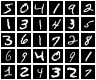

32.515306122449	
32.390306122449	
5810.7704081633	


In [197]:
itorch.image(scaled_data)

index1 = 4
index2 = 7

c1 = nn.AbsCriterion()
loss1 = c1:forward(scaled_data[index1], scaled_data[index2])
print(loss1)

c2 = nn.SmoothL1Criterion()
loss2 = c2:forward(scaled_data[index1], scaled_data[index2])
print(loss2)

c3 = nn.MSECriterion()
loss3 = c3:forward(scaled_data[index1], scaled_data[index2])
print(loss3)


In [198]:
itorch.image(fullset.data[1])
itorch.image(scaled_data[1])
itorch.image(image.scale(scaled_data[1],28,28))

In [204]:
a = torch.Tensor(28,28):copy(image.scale(image.scale(fullset.data[1], 14, 14), 28, 28))
print(a:size())
b = torch.Tensor(28,28):copy(fullset.data[1])
print(b:size())
c1 = nn.AbsCriterion()
loss1 = c1:forward(a, b)
print(loss1)

 28
 28
[torch.LongStorage of size 2]

 28
 28
[torch.LongStorage of size 2]

17.961734693878	


In [31]:
-- scaled_data = image.scale(fullset.data[{{1,300}}], 14, 14)
-- scaled_data = scaled_data:reshape(300,1,14,14):type('torch.DoubleTensor')
-- data = scaled_data[{{1,2}}]
-- data = data:reshape(2,1,14,14):type('torch.DoubleTensor')
-- print(data:size())
-- m1 = nn.SpatialConvolution(1,8,3,3,1,1,1,1)
-- o1 = m1:forward(data)
-- print(o1:size())

model = nn.Sequential()
model:add(nn.SpatialConvolution(1,8,3,3,1,1,1,1))
model:add(nn.LeakyReLU(0.2))
-- model:add(nn.SpatialConvolution(8,8,3,3,1,1,1,1))
-- model:add(nn.LeakyReLU(0.2))
-- model:add(nn.SpatialBatchNormalization(8))

model:add(nn.SpatialFullConvolution(8, 8, 2, 2, 2, 2, 0, 0, 0, 0))
model:add(nn.LeakyReLU(0.2))
-- model:add(nn.SpatialBatchNormalization(8))

model:add(nn.View(8*28*28))


-- model:add(nn.Linear(8*28*28, 2*28*28))
-- model:add(nn.Sigmoid())
model:add(nn.Linear(8*28*28, 28*28))
-- model:add(nn.LeakyReLU(0.2))
-- model:add(nn.Linear(1024, 1))
model:add(nn.Sigmoid())

-- output = model:forward(data)
-- print(output:size())

In [4]:
-- loss3 = c3:forward(scaled_data[index1], scaled_data[index2])

In [44]:

fullset = mnist.traindataset()
-- testset = mnist.testdataset()


label = fullset.data:type('torch.DoubleTensor')
mean = label:mean()
std = label:std()
label:add(-mean)
label:div(std)

label = label[{{1,300}}]

data = image.scale(label, 14, 14)


label = label:resize(300,1,28,28)
data = data:resize(300,1,14,14)



trainset = {}
trainset.data = data
trainset.label = label
-- ignore setmetatable for now, it is a feature beyond the scope of this tutorial. It sets the index operator.
setmetatable(trainset, 
    {__index = function(t, i) 
                    return {t.data[i], t.label[i]} 
                end}
);

function trainset:size() 
    return self.data:size(1)
end

-- print(torch.type(data))
-- print(torch.type(label))
-- itorch.image(data[1])
-- itorch.image(label[1])




In [55]:
criterion = nn.MSECriterion()
trainer = nn.StochasticGradient(model, criterion)
trainer.learningRate = 0.1
trainer.maxIteration = 20
trainer:train(trainset)

# StochasticGradient: training	


# current error = 0.57677172678933	


# current error = 0.56044737628699	


# current error = 0.54801221557092	


# current error = 0.53990899850339	


# current error = 0.53403252318765	


# current error = 0.52901172788067	


# current error = 0.5251003657411	


# current error = 0.52115578148748	


# current error = 0.51732894456273	


# current error = 0.51456276080253	


# current error = 0.5124489390435	


# current error = 0.51048271595216	


# current error = 0.50855443415139	


# current error = 0.50717554028006	


# current error = 0.50612090303876	


# current error = 0.50507935409953	


# current error = 0.50405551155187	


# current error = 0.50313877946358	


# current error = 0.5023820382972	


# current error = 0.50157437674233	
# StochasticGradient: you have reached the maximum number of iterations	
# training error = 0.50157437674233	


In [56]:
-- model:forward(trainset.data[1])
s = model:forward(trainset.data[1])
-- print(s:resize(28,28))
itorch.image(s:resize(28,28))

In [83]:
index = 26
itorch.image(data[index])
itorch.image(label[index])
s = model:forward(trainset.data[index])
itorch.image(s:resize(28,28))


In [85]:
-- print(s)